In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [36]:
df = pd.read_csv("train_data.csv")

In [37]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
df.shape

(42000, 785)

In [39]:
df.sample()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
21115,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


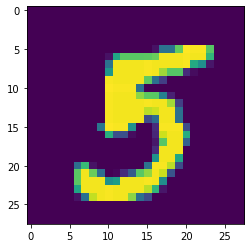

In [40]:
plt.imshow(df.iloc[38524,1:].values.reshape(28,28))

In [41]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [42]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [43]:
X_train.shape

(33600, 784)

In [44]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

In [45]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9651190476190477

In [46]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [47]:
from sklearn.decomposition import PCA
pca = PCA(n_components=200)

X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [48]:
X_train_trf.shape

(33600, 200)

In [49]:
knn = KNeighborsClassifier()
knn.fit(X_train_trf,y_train)
y_pred = knn.predict(X_test_trf)

accuracy_score(y_test,y_pred)

0.9467857142857142

In [50]:
# transforming to a 2D coordinate system
pca = PCA(n_components=2)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [51]:
X_train_trf

array([[-0.84755959,  1.74639425],
       [-2.20905883, -5.39618878],
       [-4.19081162,  0.60889332],
       ...,
       [ 4.46294106, -0.63829529],
       [-4.50160127, -1.19687806],
       [ 0.11943204,  0.96085086]])

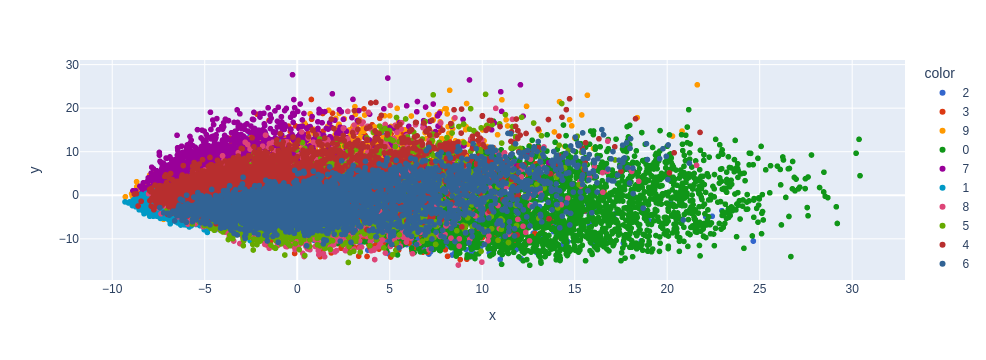

In [52]:
import plotly.express as px
y_train_trf = y_train.astype(str)
fig = px.scatter(x=X_train_trf[:,0],
                 y=X_train_trf[:,1],
                color=y_train_trf,
                color_discrete_sequence=px.colors.qualitative.G10
                )
fig.show()

In [53]:
# transforming to a 3D coordinate system
pca = PCA(n_components=3)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [54]:
X_train_trf

array([[-0.8475474 ,  1.74672007,  5.42109791],
       [-2.20908552, -5.39741068,  1.87018828],
       [-4.19081776,  0.60902654,  6.87749722],
       ...,
       [ 4.46298723, -0.63784978,  4.81289516],
       [-4.50156936, -1.19671045, -2.75717051],
       [ 0.11942975,  0.96094149, -1.35277235]])

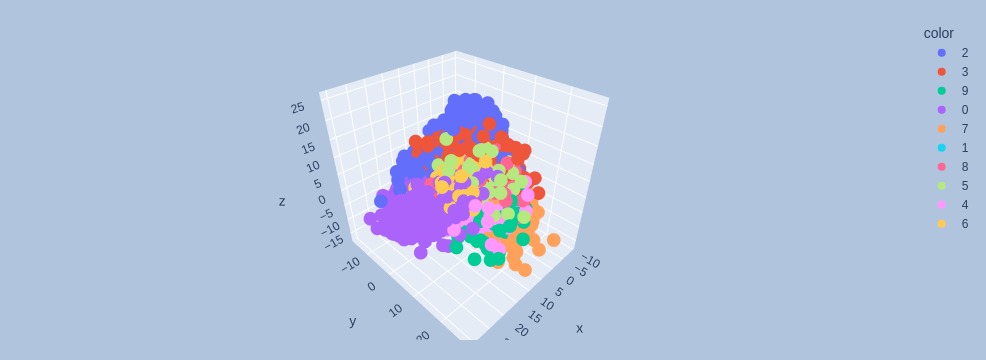

In [55]:
import plotly.express as px
y_train_trf = y_train.astype(str)
fig = px.scatter_3d(X_train_trf, x=X_train_trf[:,0], y=X_train_trf[:,1], z=X_train_trf[:,2],
              color=y_train_trf)
fig.update_layout(
    margin=dict(l=20, r=20, t=20, b=20),
    paper_bgcolor="LightSteelBlue",
)
fig.show()

In [56]:
pca.explained_variance_
# eigen values

array([40.71663636, 29.14088301, 26.81721422])

In [57]:
pca.components_.shape
# eigen vectors

(3, 784)

In [58]:
pca.explained_variance_ratio_
# percentage of eigen values

array([0.05799918, 0.04150999, 0.03820002])

In [59]:
pca = PCA(n_components=None)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [60]:
pca.explained_variance_.shape

(784,)

In [61]:
pca.components_.shape

(784, 784)

In [62]:
pca.explained_variance_ratio_
# add each eign value percentage to reach 90% 
# because it has to complete 90% variance.   # rule

array([5.79991803e-02, 4.15099941e-02, 3.82000230e-02, 2.96607288e-02,
       2.58124018e-02, 2.24697201e-02, 1.97176857e-02, 1.78677024e-02,
       1.57052746e-02, 1.43527946e-02, 1.36776242e-02, 1.23431552e-02,
       1.14780382e-02, 1.11932307e-02, 1.06489673e-02, 1.01742336e-02,
       9.55305742e-03, 9.40066285e-03, 9.18227261e-03, 8.98451006e-03,
       8.50721173e-03, 8.21952352e-03, 7.84314245e-03, 7.60246479e-03,
       7.35335020e-03, 7.09471097e-03, 7.00489567e-03, 6.75214422e-03,
       6.39723226e-03, 6.27330969e-03, 6.19365552e-03, 6.05132766e-03,
       5.89674873e-03, 5.80589192e-03, 5.72152218e-03, 5.55692620e-03,
       5.46343151e-03, 5.30463762e-03, 5.12583098e-03, 5.00835566e-03,
       4.91852432e-03, 4.85103983e-03, 4.72258152e-03, 4.64455231e-03,
       4.56995562e-03, 4.49967657e-03, 4.47777704e-03, 4.43499037e-03,
       4.41666895e-03, 4.29957350e-03, 4.23241448e-03, 4.17577938e-03,
       4.11065029e-03, 4.02499443e-03, 3.99317179e-03, 3.98320091e-03,
      

In [63]:
np.cumsum(pca.explained_variance_ratio_)

array([0.05799918, 0.09950917, 0.1377092 , 0.16736993, 0.19318233,
       0.21565205, 0.23536973, 0.25323744, 0.26894271, 0.28329551,
       0.29697313, 0.30931628, 0.32079432, 0.33198755, 0.34263652,
       0.35281075, 0.36236381, 0.37176447, 0.38094675, 0.38993126,
       0.39843847, 0.40665799, 0.41450114, 0.4221036 , 0.42945695,
       0.43655166, 0.44355656, 0.4503087 , 0.45670593, 0.46297924,
       0.4691729 , 0.47522423, 0.48112097, 0.48692687, 0.49264839,
       0.49820532, 0.50366875, 0.50897338, 0.51409922, 0.51910757,
       0.5240261 , 0.52887714, 0.53359972, 0.53824427, 0.54281422,
       0.5473139 , 0.55179168, 0.55622667, 0.56064334, 0.56494291,
       0.56917533, 0.5733511 , 0.57746176, 0.58148675, 0.58547992,
       0.58946312, 0.59336758, 0.59714261, 0.60087936, 0.60457987,
       0.60820612, 0.61177812, 0.61530108, 0.61878842, 0.62222742,
       0.62561036, 0.62897869, 0.63231763, 0.63555434, 0.63876658,
       0.64193464, 0.64506916, 0.64816639, 0.65124861, 0.65431

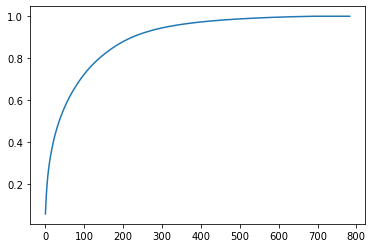

In [64]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [65]:
# Note--
# every eigen value explain that its corresponding eigen vector explain how much variance of the original data.